# Instalasi Library yang diperlukan

# Import Library yang diperlukan

<h1> Natural Language Tool Kit </h1>

* Natural Language Toolkit atau yang biasa disingkat dengan NLTK adalah sebuah 
platform berbasis Python yang dikembangkan untuk memproses data text.
* Toolkit Bahasa Alami adalah perpustakaan open source untuk bahasa pemrograman Python yang awalnya ditulis oleh Steven Bird, Edward Loper dan Ewan Klein untuk digunakan dalam pengembangan dan pendidikan.
Muncul dengan panduan langsung yang memperkenalkan topik dalam linguistik komputasi serta fundamental pemrograman untuk python yang membuatnya cocok untuk ahli bahasa yang tidak memiliki pengetahuan mendalam dalam pemrograman, insinyur dan peneliti yang perlu mempelajari linguistik komputasi, siswa dan pendidik.
* NLTK mencakup lebih dari 50 sumber korpora dan leksikal seperti Penn Treebank Corpus, WordNet multibahasa terbuka, Corpus Laporan Masalah, dan Thesaurus Ketergantungan Lin.

In [ ]:
#Natural Language Tool Kit
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h1> Sastrawi </h1>

* Sebuah modul sederhana yang dimiliki oleh library python yang memungkinkan untuk melakukan pengurang kata-kata yang ter- infleksi dalam bahasa Indonesia ke bentuk baku-nya atau sesuai dengan standar kamus.

In [ ]:
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 6.5 MB/s eta 0:00:00


In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
import string
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from collections import Counter
from sklearn.naive_bayes import MultinomialNB

# Pembacaan Dataset

In [ ]:
df_eng = pd.read_csv('spam_eng.csv',encoding='latin-1')
df_indo = pd.read_csv('spam_indo.csv',encoding='latin-1')

In [ ]:
df_eng.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df_indo.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [ ]:
df_eng.shape

(5572, 5)

In [ ]:
df_indo.shape

(1143, 2)

# Data Cleaning Indonesia

Data Cleansing juga dikenal dengan Data Scrubbing adalah proses menyiapkan data dengan cara menghapus atau memodifikasi data yang salah, tidak relevan, tidak akurat, duplikat, maupun yang tidak terformat.

In [ ]:
df_indo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Teks    1143 non-null   object
 1   label   1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


<h2> Mengganti nama kolom

In [ ]:
df_indo.rename(columns={'Teks':'teks','label':'target'},inplace=True)

In [ ]:
encoder = LabelEncoder()

In [ ]:
df_indo['target'] = encoder.fit_transform(df_indo['target'])
df_indo.head()

,teks,target
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [ ]:
df_indo.isnull().sum()

teks      0
target    0
dtype: int64

In [ ]:
df_indo.duplicated().sum()

1

In [ ]:
df_indo = df_indo.drop_duplicates(keep='first')

In [ ]:
df_indo.duplicated().sum()

0

In [ ]:
df_indo.shape

(1142, 2)

# Exploratory Data Analysis

* melakukan penyelidikan awal pada data untuk menemukan pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi dengan bantuan statistik ringkasan dan representasi grafis.

In [ ]:
df_indo['target'].value_counts()

0    568
1    335
2    239
Name: target, dtype: int64

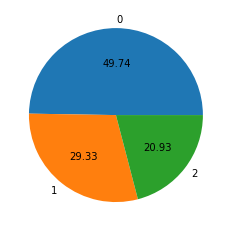

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df_indo['target'].value_counts(), labels=['0','1','2'],autopct="%0.2f")
plt.show()

In [ ]:
#Natural Language Tool Kit
# !pip install nltk

In [ ]:
# import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# banyaknya karakter pada teks

df_indo['jumlah_karakter'] = df_indo['teks'].apply(len)
df_indo.head()

,teks,target,jumlah_karakter
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,153
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,152
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,152
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,153
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,113


In [ ]:
# banyaknya kata pada teks

df_indo['jumlah_kata'] = df_indo['teks'].apply(len)
df_indo.head()

,teks,target,jumlah_karakter,jumlah_kata
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,153,153
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,152,152
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,152,152
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,153,153
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,113,113


In [ ]:
# banyaknya kalimat pada teks

df_indo['jumlah_kalimat'] = df_indo['teks'].apply(len)
df_indo.head()

,teks,target,jumlah_karakter,jumlah_kata,jumlah_kalimat
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,153,153,153
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,152,152,152
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,152,152,152
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,153,153,153
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,113,113,113


In [ ]:
df_indo[['jumlah_karakter','jumlah_kata','jumlah_kalimat']].describe()

,jumlah_karakter,jumlah_kata,jumlah_kalimat
count,1142.000000,1142.000000,1142.000000
mean,108.892294,108.892294,108.892294
std,59.069084,59.069084,59.069084
min,13.000000,13.000000,13.000000
25%,58.000000,58.000000,58.000000
50%,113.000000,113.000000,113.000000
75%,152.000000,152.000000,152.000000
max,434.000000,434.000000,434.000000


In [ ]:
# mendeskripsikan banyaknya data yang yang bertipe 0 (sms normal)

df_indo[df_indo['target'] == 0][['jumlah_karakter','jumlah_kata','jumlah_kalimat']].describe()

,jumlah_karakter,jumlah_kata,jumlah_kalimat
count,568.000000,568.000000,568.000000
mean,70.681338,70.681338,70.681338
std,46.223583,46.223583,46.223583
min,13.000000,13.000000,13.000000
25%,42.000000,42.000000,42.000000
50%,59.000000,59.000000,59.000000
75%,83.250000,83.250000,83.250000
max,434.000000,434.000000,434.000000


In [ ]:
# mendeskripsikan banyaknya data yang yang bertipe 1 (penipuan)

df_indo[df_indo['target'] == 1][['jumlah_karakter','jumlah_kata','jumlah_kalimat']].describe()

,jumlah_karakter,jumlah_kata,jumlah_kalimat
count,335.000000,335.000000,335.000000
mean,150.985075,150.985075,150.985075
std,49.421047,49.421047,49.421047
min,46.000000,46.000000,46.000000
25%,135.000000,135.000000,135.000000
50%,151.000000,151.000000,151.000000
75%,160.000000,160.000000,160.000000
max,431.000000,431.000000,431.000000


In [ ]:
# mendeskripsikan banyaknya data yang yang bertipe 2 (promo)

df_indo[df_indo['target'] == 2][['jumlah_karakter','jumlah_kata','jumlah_kalimat']].describe()

,jumlah_karakter,jumlah_kata,jumlah_kalimat
count,239.000000,239.000000,239.000000
mean,140.702929,140.702929,140.702929
std,34.856483,34.856483,34.856483
min,50.000000,50.000000,50.000000
25%,123.000000,123.000000,123.000000
50%,142.000000,142.000000,142.000000
75%,156.000000,156.000000,156.000000
max,321.000000,321.000000,321.000000


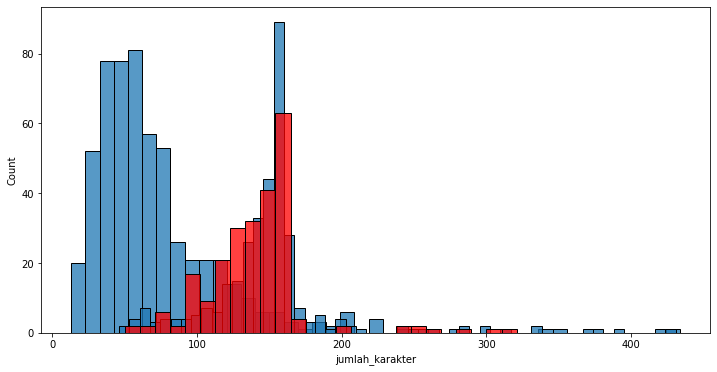

In [ ]:
# Data Visualization

plt.figure(figsize=(12,6))
sns.histplot(df_indo[df_indo['target'] == 0]['jumlah_karakter'])
sns.histplot(df_indo[df_indo['target'] == 1]['jumlah_karakter'])
sns.histplot(df_indo[df_indo['target'] == 2]['jumlah_karakter'],color='red')

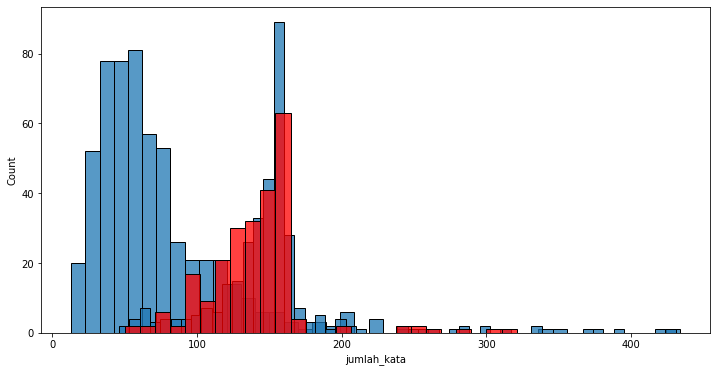

In [ ]:
# Data Visualization

plt.figure(figsize=(12,6))
sns.histplot(df_indo[df_indo['target'] == 0]['jumlah_kata'])
sns.histplot(df_indo[df_indo['target'] == 1]['jumlah_kata'])
sns.histplot(df_indo[df_indo['target'] == 2]['jumlah_kata'],color='red')

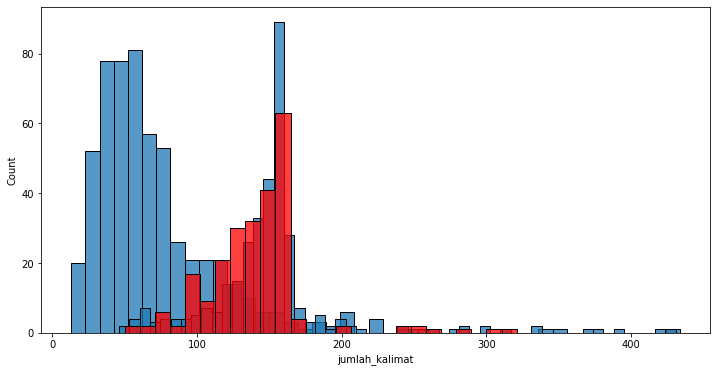

In [ ]:
# Data Visualization

plt.figure(figsize=(12,6))
sns.histplot(df_indo[df_indo['target'] == 0]['jumlah_kalimat'])
sns.histplot(df_indo[df_indo['target'] == 1]['jumlah_kalimat'])
sns.histplot(df_indo[df_indo['target'] == 2]['jumlah_kalimat'],color='red')

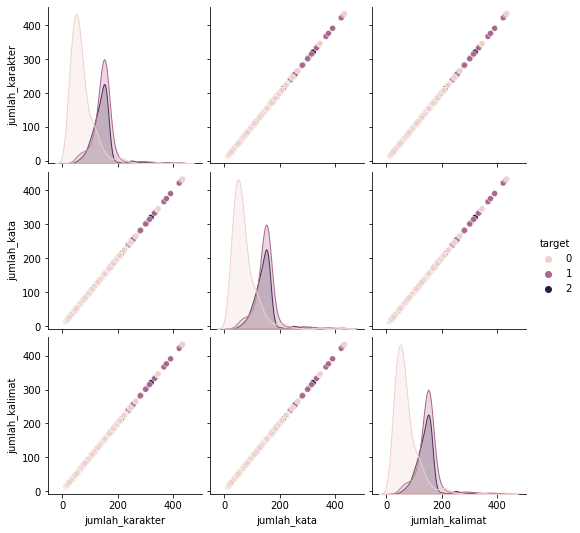

In [ ]:
sns.pairplot(df_indo,hue='target')

# Data Preprocessing

teknik yang digunakan untuk mengubah data mentah dalam format yang berguna dan efisien.

In [ ]:
# pip install PySastrawi

In [ ]:
# import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk.corpus import stopwords
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stop_words = set(stopwords.words('indonesian'))

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
stemmer.stem('mencintai')

'cinta'

In [ ]:
# import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('indonesian') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(stemmer.stem(i))
    
            
    return " ".join(y)

In [ ]:
transform_text("Anda akan mengaktifkan Paket BBM Gratis berlaku 30 hari dari pertama kali aktivasi. Ketik FLASH (spasi) YA untuk melanjutkan")

'aktif paket bbm gratis laku 30 kali aktivasi ketik flash spasi ya lanjut'

In [ ]:
df_indo['teks'][10]

'Anda akan berhenti berlangganan Paket Flash. Ketik FLASH<spasi>YA jika setuju. Tunggu SMS konfirmasi penonaktifan Paket Anda'

In [ ]:
df_indo['transformasi_teks'] = df_indo['teks'].apply(transform_text)
df_indo.head()

,teks,target,jumlah_karakter,jumlah_kata,jumlah_kalimat,transformasi_teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,153,153,153,promo beli paket flash 1gb my telkomsel app dp...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,152,152,152,rp 35 ribu spesial pilih aktif 550 905 promo s...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,152,152,152,yth sisa kuota flash 478kb download mytelkomse...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,153,153,153,yth sisa kuota flash 7160kb download mytelkoms...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,113,113,113,rp 55 ribu spesial pilih aktif 550 907 buru skb


In [ ]:
sms_normal = []
for msg in df_indo[df_indo['target'] == 0]['transformasi_teks'].tolist():
    for word in msg.split():
        sms_normal.append(word)

In [ ]:
len(sms_normal)

4560

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


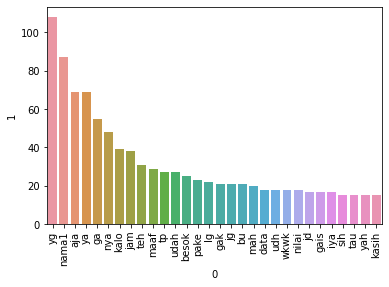

In [ ]:
# from collections import Counter
sns.barplot(pd.DataFrame(Counter(sms_normal).most_common(30))[0],pd.DataFrame(Counter(sms_normal).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
penipuan = []
for msg in df_indo[df_indo['target'] == 1]['transformasi_teks'].tolist():
    for word in msg.split():
        penipuan.append(word)

In [ ]:
len(penipuan)

5027

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


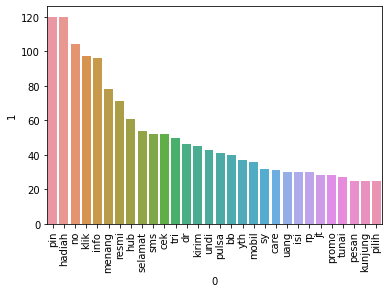

In [ ]:
# from collections import Counter
sns.barplot(pd.DataFrame(Counter(penipuan).most_common(30))[0],pd.DataFrame(Counter(penipuan).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
promo = []
for msg in df_indo[df_indo['target'] == 2]['transformasi_teks'].tolist():
    for word in msg.split():
        promo.append(word)

In [ ]:
len(promo)

3789

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


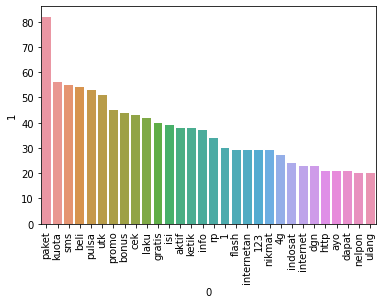

In [ ]:
# from collections import Counter
sns.barplot(pd.DataFrame(Counter(promo).most_common(30))[0],pd.DataFrame(Counter(promo).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df_indo['target'] = df_indo['target'].replace([2], 1)


In [ ]:
df_indo.sample(5)

,teks,target,jumlah_karakter,jumlah_kata,jumlah_kalimat,transformasi_teks
250,Artha Cell diskon Brg elektronik BB Dakota 3 j...,1,150,150,150,artha cell diskon brg elektronik bb dakota 3 j...
484,Selamat!! Â anda Mendpt hadiah Rp. 75 juta. Da...,1,131,131,131,selamat mendpt hadiah rp 75 juta telkomsel po...
1035,"Selamat siang, mau reservasi bandros peroranga...",0,60,60,60,selamat siang reservasi bandros orang
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,1,153,153,153,promo beli paket flash 1gb my telkomsel app dp...
121,Mau BONUS KEREN dari Indosat ooredoo? Ketik *3...,1,80,80,80,bonus keren indosat ooredoo ketik 345 hp


# Data Cleaning English

Data Cleansing juga dikenal dengan Data Scrubbing adalah proses menyiapkan data dengan cara menghapus atau memodifikasi data yang salah, tidak relevan, tidak akurat, duplikat, maupun yang tidak terformat.

In [ ]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Teks    1143 non-null   object
 1   label   1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


<h2> Mengganti nama kolom

In [ ]:
df_eng.rename(columns={'v1':'target','v2':'teks'},inplace=True)
new_cols = ["teks","target"]
df_eng=df_eng[new_cols]
#or
df_eng=df_eng.reindex(columns=new_cols)

In [ ]:
encoder = LabelEncoder()

In [ ]:
df_eng['target'] = encoder.fit_transform(df_eng['target'])
df_eng.head()

,teks,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df_eng.isnull().sum()

teks      0
target    0
dtype: int64

In [ ]:
df_eng.duplicated().sum()

403

In [ ]:
df_eng = df_eng.drop_duplicates(keep='first')

In [ ]:
df_eng.duplicated().sum()

0

In [ ]:
df_eng.shape

(5169, 2)

In [ ]:
df_eng['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

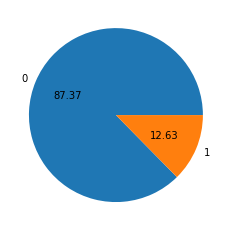

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df_eng['target'].value_counts(), labels=['0','1'],autopct="%0.2f")
plt.show()

In [ ]:
#Natural Language Tool Kit
# !pip install nltk

In [ ]:
# import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# banyaknya karakter pada teks

df_eng['jumlah_karakter'] = df_eng['teks'].apply(len)
df_eng.head()

,teks,target,jumlah_karakter
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [ ]:
# banyaknya kata pada teks

df_eng['jumlah_kata'] = df_eng['teks'].apply(len)
df_eng.head()

,teks,target,jumlah_karakter,jumlah_kata
0,"Go until jurong point, crazy.. Available only ...",0,111,111
1,Ok lar... Joking wif u oni...,0,29,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,155
3,U dun say so early hor... U c already then say...,0,49,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61,61


In [ ]:
# banyaknya kalimat pada teks

df_eng['jumlah_kalimat'] = df_eng['teks'].apply(len)
df_eng.head()

,teks,target,jumlah_karakter,jumlah_kata,jumlah_kalimat
0,"Go until jurong point, crazy.. Available only ...",0,111,111,111
1,Ok lar... Joking wif u oni...,0,29,29,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,155,155
3,U dun say so early hor... U c already then say...,0,49,49,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61,61,61


In [ ]:
df_eng[['jumlah_karakter','jumlah_kata','jumlah_kalimat']].describe()

,jumlah_karakter,jumlah_kata,jumlah_kalimat
count,5169.000000,5169.000000,5169.000000
mean,78.977945,78.977945,78.977945
std,58.236293,58.236293,58.236293
min,2.000000,2.000000,2.000000
25%,36.000000,36.000000,36.000000
50%,60.000000,60.000000,60.000000
75%,117.000000,117.000000,117.000000
max,910.000000,910.000000,910.000000


In [ ]:
# mendeskripsikan banyaknya data yang yang bertipe 0 (sms normal)

df_eng[df_eng['target'] == 0][['jumlah_karakter','jumlah_kata','jumlah_kalimat']].describe()

,jumlah_karakter,jumlah_kata,jumlah_kalimat
count,4516.000000,4516.000000,4516.000000
mean,70.459256,70.459256,70.459256
std,56.358207,56.358207,56.358207
min,2.000000,2.000000,2.000000
25%,34.000000,34.000000,34.000000
50%,52.000000,52.000000,52.000000
75%,90.000000,90.000000,90.000000
max,910.000000,910.000000,910.000000


In [ ]:
# mendeskripsikan banyaknya data yang yang bertipe 1 (penipuan)

df_eng[df_eng['target'] == 1][['jumlah_karakter','jumlah_kata','jumlah_kalimat']].describe()

,jumlah_karakter,jumlah_kata,jumlah_kalimat
count,653.000000,653.000000,653.000000
mean,137.891271,137.891271,137.891271
std,30.137753,30.137753,30.137753
min,13.000000,13.000000,13.000000
25%,132.000000,132.000000,132.000000
50%,149.000000,149.000000,149.000000
75%,157.000000,157.000000,157.000000
max,224.000000,224.000000,224.000000


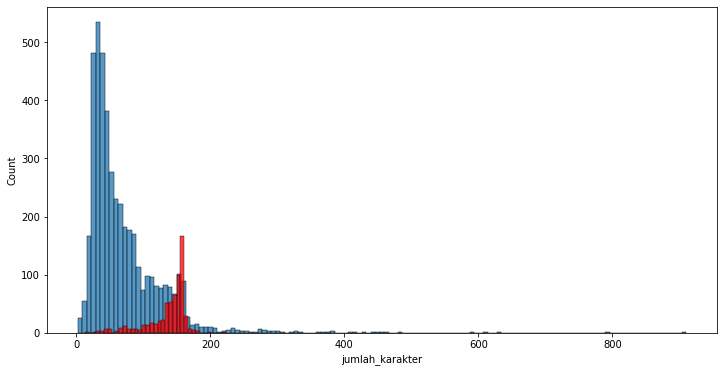

In [ ]:
# Data Visualization

plt.figure(figsize=(12,6))
sns.histplot(df_eng[df_eng['target'] == 0]['jumlah_karakter'])
sns.histplot(df_eng[df_eng['target'] == 1]['jumlah_karakter'],color='red')

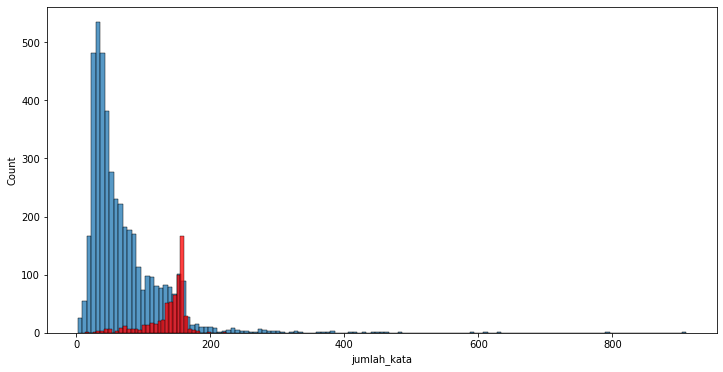

In [ ]:
# Data Visualization

plt.figure(figsize=(12,6))
sns.histplot(df_eng[df_eng['target'] == 0]['jumlah_kata'])
sns.histplot(df_eng[df_eng['target'] == 1]['jumlah_kata'],color='red')

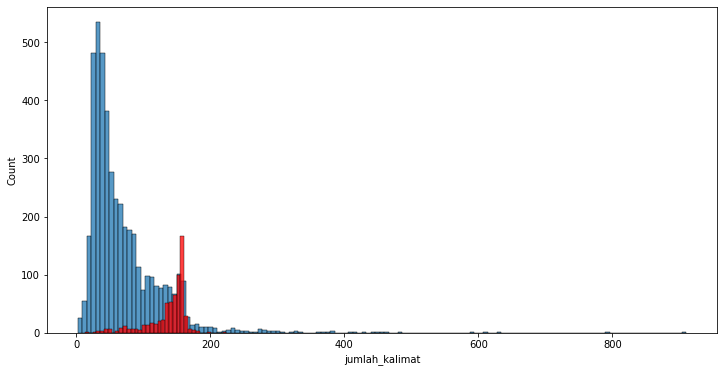

In [ ]:
# Data Visualization

plt.figure(figsize=(12,6))
sns.histplot(df_eng[df_eng['target'] == 0]['jumlah_kalimat'])
sns.histplot(df_eng[df_eng['target'] == 1]['jumlah_kalimat'],color='red')

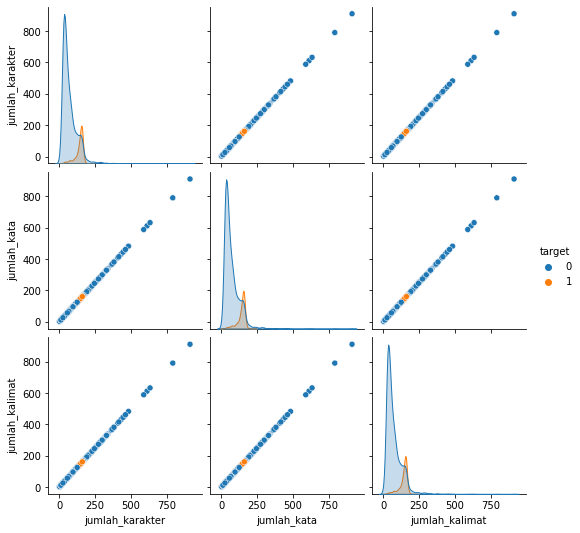

In [ ]:
sns.pairplot(df_eng,hue='target')

# Data Preprocessing

In [ ]:
# pip install PySastrawi

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string 
from nltk.stem import PorterStemmer


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()

    ps = PorterStemmer()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df_eng['teks'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
df_eng['transformasi_teks'] = df_eng['teks'].apply(transform_text)
df_eng.head()

,teks,target,jumlah_karakter,jumlah_kata,jumlah_kalimat,transformasi_teks
0,"Go until jurong point, crazy.. Available only ...",0,111,111,111,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,29,29,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,155,155,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,49,49,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,61,61,nah think goe usf live around though


In [ ]:
sms_normal = []
for msg in df_eng[df_eng['target'] == 0]['transformasi_teks'].tolist():
    for word in msg.split():
        sms_normal.append(word)

In [ ]:
len(sms_normal)

35394

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


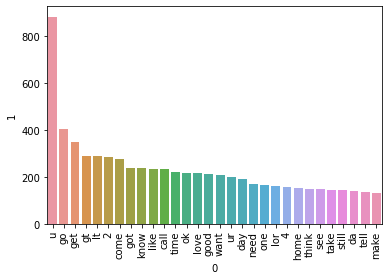

In [ ]:
# from collections import Counter
sns.barplot(pd.DataFrame(Counter(sms_normal).most_common(30))[0],pd.DataFrame(Counter(sms_normal).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
spam = []
for msg in df_eng[df_eng['target'] == 1]['transformasi_teks'].tolist():
    for word in msg.split():
        spam.append(word)

In [ ]:
len(spam)

9939

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


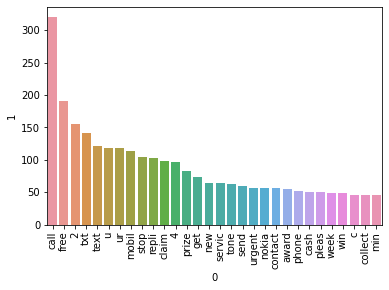

In [ ]:
# from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam).most_common(30))[0],pd.DataFrame(Counter(spam).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df_eng.sample(5)

,teks,target,jumlah_karakter,jumlah_kata,jumlah_kalimat,transformasi_teks
1220,No. 1 Nokia Tone 4 ur mob every week! Just txt...,1,143,143,143,1 nokia tone 4 ur mob everi week txt nok 87021...
5448,"aight we can pick some up, you open before ton...",0,51,51,51,aight pick open tonight
3531,"Actually, my mobile is full of msg. And i m do...",0,134,134,134,actual mobil full msg work onlin need send lt ...
2440,"Great. I'm in church now, will holla when i ge...",0,51,51,51,great church holla get
5248,U come n search tat vid..not finishd..,0,38,38,38,u come n search tat vid finishd


Join Data Frame

In [ ]:
df = pd.concat([df_indo,df_eng])
df.sample(5)

,teks,target,jumlah_karakter,jumlah_kata,jumlah_kalimat,transformasi_teks
555,"Transfer ke BNI aja, a/n SORAYA HARUM rek;0233...",1,83,83,83,transfer bni aja soraya harum rek klo sdh kbri...
35,BONUS KUOTA 500MB (1hr)! Cukup isi ulang min. ...,1,102,102,102,bonus kuota 500mb 1hr isi ulang min ayo buru i...
477,Tension ah?what machi?any problem?,0,34,34,34,tension ah machi problem
1105,on hen night. Going with a swing,0,32,32,32,hen night go swing
4777,U R THE MOST BEAUTIFUL GIRL IVE EVER SEEN. U R...,0,87,87,87,u r beauti girl ive ever seen u r babi come c ...


# Membuat Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['teks'], 
                                                    df['target'],test_size=0.20, 
                                                    random_state=1)

In [ ]:
# Inisialisasi metode CountVectorizer 
hitung_vector = CountVectorizer()

# Menyesuaikan data latih dan kemudian kembalikan matriks
training_data = hitung_vector.fit_transform(X_train)

# Transformasi data tes dan kemudian kembalikan matriks
testing_data = hitung_vector.transform(X_test)

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

In [ ]:
predictions = naive_bayes.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions, average='micro')))
print('Recall score: {}'.format(recall_score(y_test, predictions, average='micro')))
print('F1 score: {}'.format(f1_score(y_test, predictions, average='micro')))

Accuracy score: 0.9564528899445764
Precision score: 0.9564528899445764
Recall score: 0.9564528899445764
F1 score: 0.9564528899445764


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
text_clf = Pipeline([('vect', hitung_vector),
('tfidf', TfidfTransformer()),
('clf', naive_bayes)])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

# Testing Data

In [ ]:
# Anda bisa mengganti array di dalam variabel sms_baru
# sms_baru = ['indonesia','inggris']

sms_baru = ['Anda mendapatkan hadiah mobil','nanti ketemu dimana?','Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600.']
pred = text_clf.predict(sms_baru)


for i in range(len(sms_baru)):
  if pred[i]==1:
    print(sms_baru[i]," : spam")
  else :
    print(sms_baru[i]," : bukan spam")

Anda mendapatkan hadiah mobil  : spam
nanti ketemu dimana?  : bukan spam
Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600.  : spam
